In [1]:
import pandas as pd

# To read a directory
import os

# For the analysis and ploting
import matplotlib.pyplot as plt
import seaborn as sb

# Prepare (Clean) the data

In [2]:
# Testing if pandas works + if I can correctly get to the right file path (directory)

# Load a csv file into/as a dataframe
df = pd.read_csv("./sales_data/Sales_February_2019.csv")

# Print the loaded file
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,150502,iPhone,1,700,02/18/19 01:35,"866 Spruce St, Portland, ME 04101"
1,150503,AA Batteries (4-pack),1,3.84,02/13/19 07:24,"18 13th St, San Francisco, CA 94016"
2,150504,27in 4K Gaming Monitor,1,389.99,02/18/19 09:46,"52 6th St, New York City, NY 10001"
3,150505,Lightning Charging Cable,1,14.95,02/02/19 16:47,"129 Cherry St, Atlanta, GA 30301"
4,150506,AA Batteries (4-pack),2,3.84,02/28/19 20:32,"548 Lincoln St, Seattle, WA 98101"
...,...,...,...,...,...,...
12031,162004,Apple Airpods Headphones,1,150,02/12/19 22:02,"227 Church St, San Francisco, CA 94016"
12032,162005,AAA Batteries (4-pack),2,2.99,02/04/19 20:44,"417 Jefferson St, Los Angeles, CA 90001"
12033,162006,USB-C Charging Cable,1,11.95,02/24/19 06:31,"498 8th St, Atlanta, GA 30301"
12034,162007,USB-C Charging Cable,1,11.95,02/24/19 19:09,"715 7th St, Dallas, TX 75001"


In [3]:
# see all the files in the folder
# remember python is case sensitive

files = [file for file in os.listdir("./sales_data")]

for file in files:
    df = pd.read_csv("./sales_data/Sales_February_2019.csv")

In [4]:
# Now we are going to merge the files into one
# see all the files in the folder
# remember python is case sensitive

files = [file for file in os.listdir("./sales_data")]

entire_data = pd.DataFrame()

for file in files:
    df = pd.read_csv("./sales_data/"+file)
    entire_data = pd.concat([entire_data, df])
    
# Delete index or serial number from the concartinated df
entire_data.to_csv("entire_data.csv", index=False)

In [5]:
# Read the updated dataframe
all_data = pd.read_csv("entire_data.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [6]:
#Augmenting the data

In [7]:
# Clean the data
# There are some NaN (Not a Number) values, we need to clean them up.
# One way is to drop ROWS of NaN
# PLEASE NOTE: Just the NaN ROWS, not columns.

# Let see the NaN ROWS
nan_df = entire_data[entire_data.isna().any(axis=1)]
nan_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
10012,NaN,NaN,NaN,NaN,NaN,NaN
10274,NaN,NaN,NaN,NaN,NaN,NaN
10878,NaN,NaN,NaN,NaN,NaN,NaN
11384,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# Delete the NaN ROWS
# You can open the csv file at this point and make sure Nan only appears on an entire row, not just 1 or 2 value on a row
entire_data = entire_data.dropna(how='all')
entire_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [9]:
# Make months numbers


# Pick the first two chaaracters from the Month column.
entire_data['Month'] = entire_data['Order Date'].str[0:2]
# entire_data['Month'] will be pulld out as a string.


# Make entire_data['Month'] an integer
entire_data['Month'] = entire_data['Month'].astype('int32')
entire_data.head()

ValueError: invalid literal for int() with base 10: 'Or'

In [10]:
# The error above says that there is Or in our Month colum. we need to clean that
# First find where it is happening

or_df = entire_data[entire_data['Order Date'].str[0:2] == 'Or']
or_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
...,...,...,...,...,...,...,...
10000,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
10387,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
11399,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
11468,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or


In [11]:
# All the tables we concartinated came with their own headings. Thats what giving the errors
# Now that we know what the issue is, we can either isolate them.
# We can either drop them or work with data without 'Or'
# Here, we will work with data that is not 'Or'
# We can make our 'entire_data' = everything WITHOUT 'Or'

entire_data = entire_data[entire_data['Order Date'].str[0:2] != 'Or']

In [12]:
# Now we retry the conversion
# Make entire_data['Month'] an integer
entire_data['Month'] = entire_data['Month'].astype('int32')
entire_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


In [13]:
# You may want to multiply values in the table.
# For instance, multiplying interest rate by the number of months, etc.
# I will show you an example by multiplying price by the number of sale.

# Always ensure the column in question is an integer or float, when you want to compute.
entire_data['Quantity Ordered'] = pd.to_numeric(entire_data['Quantity Ordered'])
entire_data['Price Each'] = pd.to_numeric(entire_data['Price Each'])

In [14]:
# Now, multiply
entire_data['Sales']= entire_data['Quantity Ordered'] * entire_data['Price Each']

In [15]:
entire_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99
...,...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,8.97
11682,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00
11683,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,700.00
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,379.99


In [16]:
# Break The Date and time apart, so you can further analize following a specific date.
# First, let me show you how to split

# Assign date and time to a variable
dt = '04/19/19 08:46'

# assign 2 variables to carry both values (the date and the time).
# And we will split on the bases of the space inbetween the time and time
d,t = dt.split(' ')
print(d)
print(t)

04/19/19
08:46


In [17]:
# You can further split the date on the bases of '/' to givve you a month, day and year.
m,d,y = d.split('/')

# print with the int() function so that all the valies will be integers

print(int(m))
print(int(d))
print(int(y))

4
19
19


In [18]:
# Back to our entire_data
# Lets do same
# Python doesnt undrstand date in the format we have it (04/19/19 08:46). We need to reformat it
# This process should take a while, depending on your PC

entire_data['Clean Date/Time'] = entire_data['Order Date'].map(pd.to_datetime)

In [19]:
entire_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,Clean Date/Time
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,2019-04-19 08:46:00
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,2019-04-07 22:30:00
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,2019-04-12 14:38:00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,2019-04-12 14:38:00
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,2019-04-30 09:27:00


In [20]:
# If you need the day, you can use the following function. You can modify it for weekday and day.

def get_dom(dt):
    return dt.day

entire_data["Actual Day"] = entire_data["Clean Date/Time"].map(get_dom)

entire_data.head()

# You can replicate the code above if you want to know the month or year

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,Clean Date/Time,Actual Day
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,2019-04-19 08:46:00,19
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,2019-04-07 22:30:00,7
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,2019-04-12 14:38:00,12
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,2019-04-12 14:38:00,12
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,2019-04-30 09:27:00,30


In [21]:
# If you want to know the particular day of the week, use the code below.
dt = "2019-04-19 08:46:00"
dt = pd.to_datetime(dt)

dt.weekday_name

C:\Users\SMJ\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: `weekday_name` is deprecated and will be removed in a future version. Use `day_name` instead
  """


'Friday'

In [22]:
# Lets also get the weekday.
def get_weekday(dt):
    return dt.weekday()

entire_data['Weekday'] = entire_data['Clean Date/Time'].map(get_weekday)

entire_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,Clean Date/Time,Actual Day,Weekday
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,2019-04-19 08:46:00,19,4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,2019-04-07 22:30:00,7,6
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,2019-04-12 14:38:00,12,4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,2019-04-12 14:38:00,12,4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,2019-04-30 09:27:00,30,1


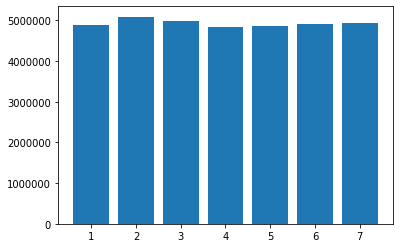

In [23]:
# Lets see the weekday with the highest sale
weekDay = range(1,8)

allWeekData = entire_data.groupby('Weekday').sum()

plt.bar(weekDay, allWeekData['Sales'])
plt.show()

# The analysis

In [24]:
entire_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,Clean Date/Time,Actual Day,Weekday
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,2019-04-19 08:46:00,19,4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,2019-04-07 22:30:00,7,6
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,2019-04-12 14:38:00,12,4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,2019-04-12 14:38:00,12,4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,2019-04-30 09:27:00,30,1


In [25]:
# Most sold product
PdtDate = entire_data.groupby('Product').sum()

# You can ignore other items and concentrate on what you actually want to see.
# For example, See the Product and Quantity ordered.

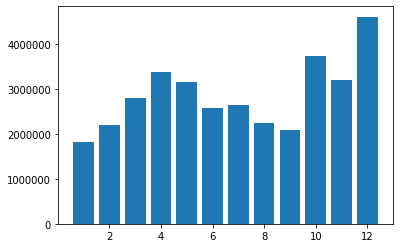

In [26]:
# We have 12 months in a year. The next integral value after 12 is 13. Thats why our range contains values between 1-13 
theMonths = range(1,13)

# We group all the values on a monthly bases. This process groups the entire table, not just the month table
# Please note: following all we have done, you can group on a weekly or daily bases.
allMonthsData = entire_data.groupby('Month').sum()


# Since the grouping merges the entire table, we can pick every data we need to analyse following this example
plt.bar(theMonths, allMonthsData['Sales'])
plt.show()

# You can follow the same procedure for item or products


In [27]:
# The month with the most sale activity
for m, rows in entire_data.groupby('Month'):
    print((m, len(rows)))

# You ccan either copy these info and plot a chart or you plot diretly from here

(1, 9709)
(2, 11975)
(3, 15153)
(4, 18279)
(5, 16566)
(6, 13554)
(7, 14293)
(8, 11961)
(9, 11621)
(10, 20282)
(11, 17573)
(12, 24984)


In [28]:
# Lets see the products we have in our table.
allProductData = entire_data.groupby('Product').sum()
allProductData

# The important items in the result shown below are are:
# The Table show the unique products.
# Quantity Ordered = Qty of products that were ordered or sold
# The sale of each product through out the year

,Quantity Ordered,Price Each,Month,Sales,Actual Day,Weekday
Product,,,,,,
20in Monitor,4129,451068.99,29336,454148.71,64237,12228
27in 4K Gaming Monitor,6244,2429637.70,44440,2435097.56,97624,18552
27in FHD Monitor,7550,1125974.93,52558,1132424.50,117702,22675
34in Ultrawide Monitor,6199,2348718.19,43304,2355558.01,97726,18619
AA Batteries (4-pack),27635,79015.68,145558,106118.40,325504,61468
AAA Batteries (4-pack),31017,61716.59,146370,92740.83,326283,61220
Apple Airpods Headphones,15661,2332350.00,109477,2349150.00,244828,46464
Bose SoundSport Headphones,13457,1332366.75,94113,1345565.43,210543,40456
Flatscreen TV,4819,1440000.00,34224,1445700.00,75959,14300
